# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [74]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "traffic-signs-data/train.p"
validation_file = "traffic-signs-data/valid.p"
testing_file = "traffic-signs-data/test.p"

def loaddata(file, mode='rb'):
    with open(file, mode='rb') as f:
        data = pickle.load(f)
    return data

train = loaddata(training_file)
valid = loaddata(validation_file)
test = loaddata(testing_file)

X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

assert( len(X_train) == len(y_train) )
assert( len(X_valid) == len(y_valid) )
assert( len(X_test) == len(y_test) )

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height of the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [75]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np

# TODO: Number of training examples
n_train = len(y_train)

# TODO: Number of validation examples
n_validation = len(y_valid)

# TODO: Number of testing examples.
n_test = len(y_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
classes, class_indices, class_counts = np.unique(y_train, 
                                                 return_index = True, return_counts = True)

n_classes = len(classes)

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print()
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630

Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

CLASS 0, Speed limit (20km/h), #SAMPLES 180


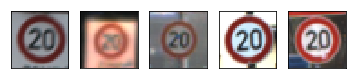

CLASS 1, Speed limit (30km/h), #SAMPLES 1980


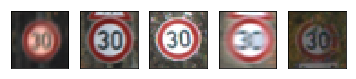

CLASS 2, Speed limit (50km/h), #SAMPLES 2010


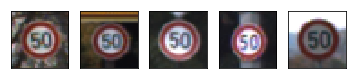

CLASS 3, Speed limit (60km/h), #SAMPLES 1260


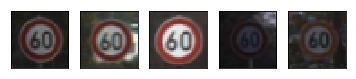

CLASS 4, Speed limit (70km/h), #SAMPLES 1770


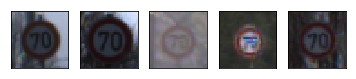

CLASS 5, Speed limit (80km/h), #SAMPLES 1650


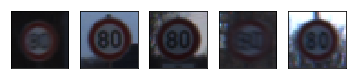

CLASS 6, End of speed limit (80km/h), #SAMPLES 360


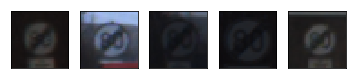

CLASS 7, Speed limit (100km/h), #SAMPLES 1290


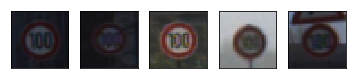

CLASS 8, Speed limit (120km/h), #SAMPLES 1260


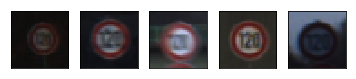

CLASS 9, No passing, #SAMPLES 1320


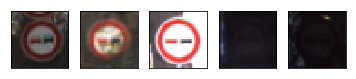

CLASS 10, No passing for vehicles over 3.5 metric tons, #SAMPLES 1800


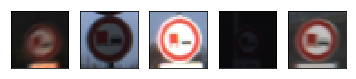

CLASS 11, Right-of-way at the next intersection, #SAMPLES 1170


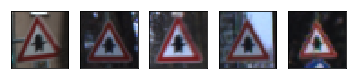

CLASS 12, Priority road, #SAMPLES 1890


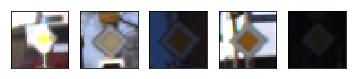

CLASS 13, Yield, #SAMPLES 1920


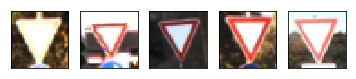

CLASS 14, Stop, #SAMPLES 690


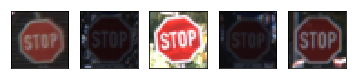

CLASS 15, No vehicles, #SAMPLES 540


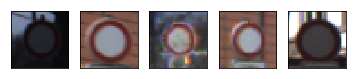

CLASS 16, Vehicles over 3.5 metric tons prohibited, #SAMPLES 360


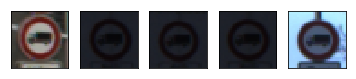

CLASS 17, No entry, #SAMPLES 990


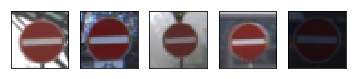

CLASS 18, General caution, #SAMPLES 1080


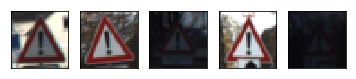

CLASS 19, Dangerous curve to the left, #SAMPLES 180


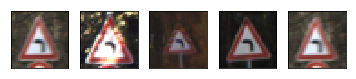

CLASS 20, Dangerous curve to the right, #SAMPLES 300


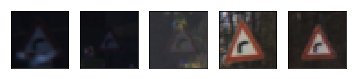

CLASS 21, Double curve, #SAMPLES 270


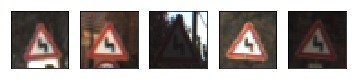

CLASS 22, Bumpy road, #SAMPLES 330


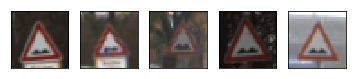

CLASS 23, Slippery road, #SAMPLES 450


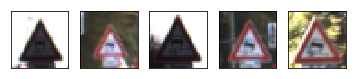

CLASS 24, Road narrows on the right, #SAMPLES 240


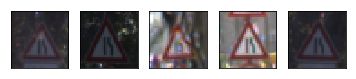

CLASS 25, Road work, #SAMPLES 1350


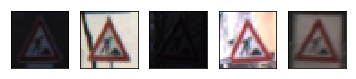

CLASS 26, Traffic signals, #SAMPLES 540


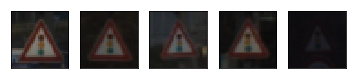

CLASS 27, Pedestrians, #SAMPLES 210


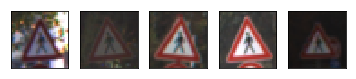

CLASS 28, Children crossing, #SAMPLES 480


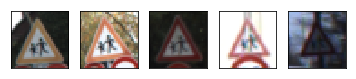

CLASS 29, Bicycles crossing, #SAMPLES 240


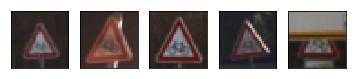

CLASS 30, Beware of ice/snow, #SAMPLES 390


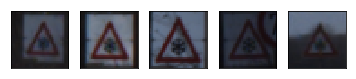

CLASS 31, Wild animals crossing, #SAMPLES 690


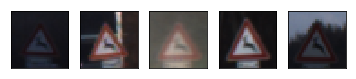

CLASS 32, End of all speed and passing limits, #SAMPLES 210


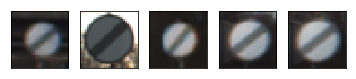

CLASS 33, Turn right ahead, #SAMPLES 599


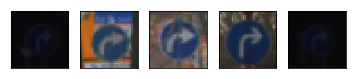

CLASS 34, Turn left ahead, #SAMPLES 360


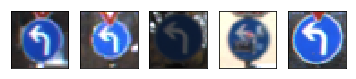

CLASS 35, Ahead only, #SAMPLES 1080


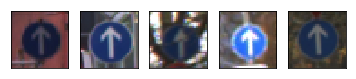

CLASS 36, Go straight or right, #SAMPLES 330


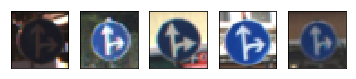

CLASS 37, Go straight or left, #SAMPLES 180


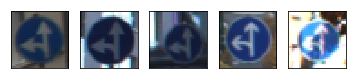

CLASS 38, Keep right, #SAMPLES 1860


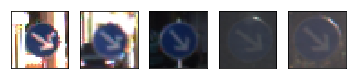

CLASS 39, Keep left, #SAMPLES 270


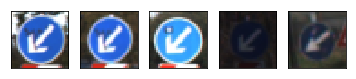

CLASS 40, Roundabout mandatory, #SAMPLES 300


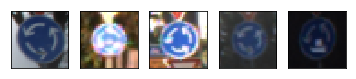

CLASS 41, End of no passing, #SAMPLES 210


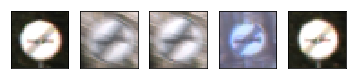

CLASS 42, End of no passing by vehicles over 3.5 metric tons, #SAMPLES 210


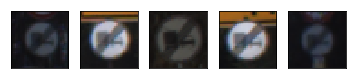

In [34]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import random
from pandas.io.parsers import read_csv
# Visualizations will be shown in the notebook.
%matplotlib inline

signnames = read_csv("signnames.csv").values[:, 1]

def vis_data(X=X_train):
    for c, start, num in zip(classes, class_indices, class_counts):
        print("CLASS {}, {}, #SAMPLES {}".format(c, signnames[c], num))    
        random_indices = random.sample(range(start, start + num), 5)
        fig = plt.figure()
        for i in range(5):
            axis = fig.add_subplot(1, 5, i + 1, xticks=[], yticks=[])
            axis.imshow(X_train[random_indices[i]])
        plt.show()

vis_data()

In [76]:
# Image for comparison at the end
children_passing = X_train[class_indices[28]+1]

In [30]:
### Convert into grayscale
def gray(X):    
    X_gray = X
    X_gray = X_gray[:,:,:,0] * 0.299 + X_gray[:,:,:,1] * 0.587 + X_gray[:,:,:,2] * 0.114
    X_gray = X_gray.reshape(X_gray.shape + (1,))
    return X_gray

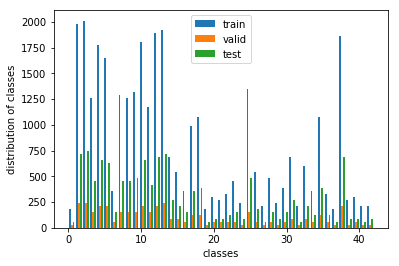

In [31]:
# a comparison of un-normalized class
plt.hist([y_train, y_valid, y_test], bins=n_classes, label=['train', 'valid', 'test'], align='mid')
plt.legend()
plt.ylabel("distribution of classes")
plt.xlabel("classes")
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [93]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
from sklearn.utils import shuffle

def preprocess(X):
    # normalization
    X = ((X - 128.) / 128.).astype(np.float32)
    # rgb to grayscale but need to update dim accordingly
    # X = gray(X)
    return X
train = loaddata(training_file)
X_train, y_train = train['features'], train['labels']
X_train = preprocess(X_train)

print("X_train shape after pre-processing:", X_train.shape)

X_train shape after pre-processing: (34799, 32, 32, 3)


### Model Architecture

In [84]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
from tensorflow.contrib.layers import flatten
import tensorflow as tf

def conv2d(X, W, b, nm, strides=2, padding='VALID'):
    strides = [1, strides, strides, 1]    
    X = tf.nn.conv2d(X, W, strides=strides, padding=padding, name=nm)
    X = tf.nn.bias_add(X, b)
    return tf.nn.relu(X)

def maxpool2d(X, k=2, strides=2, padding='VALID'):
    return tf.nn.max_pool(X, ksize=[1, k, k, 1], strides=[1, strides, strides, 1], padding=padding)

def LeNet(X, weights, bias, dropout):        
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6. Activation.
    # new_height = (input_height - filter_height + 1)/S
    conv1 = conv2d(X, weights['wc1'], biases['bc1'], nm='c1', strides=1)
    
    # Pooling. Input = 28x28x6. Output = 14x14x6.
    # new_height = (input_height - filter_height)/S + 1
    conv1 = maxpool2d(conv1)
    
    # Layer 2: Convolutional. Output = 10x10x16. Activation.
    conv2 = conv2d(conv1, weights['wc2'], biases['bc2'], nm='c2', strides=1)
    
    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = maxpool2d(conv2)
    
    # Flatten. Input = 5x5x16. Output = 400.
    fc1 = flatten(conv2)
    
    # Layer 3: Fully Connected. Input = 400. Output = 120. Activation and dropout
    fc1 = tf.add(tf.matmul(fc1, weights['wd1']), biases['bd1'])
    fc1 = tf.nn.relu(fc1)
    fc1 = tf.nn.dropout(fc1, dropout)
    
    # Layer 4: Fully Connected. Input = 120. Output = 84. Activation and dropout
    fc2 = tf.add(tf.matmul(fc1, weights['wd2']), biases['bd2'])
    fc2 = tf.nn.relu(fc2)
    fc2 = tf.nn.dropout(fc2, dropout)
    
    # Layer 5: Fully Connected. Input = 84. Output = n_classes.
    logits = tf.add(tf.matmul(fc2, weights['out']), biases['out'])
    
    return logits, conv1

In [85]:
# Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
mu = 0
sigma = 0.1

weights = {
    'wc1': tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma)),
    'wc2': tf.Variable(tf.truncated_normal(shape=[5, 5, 6, 16], mean = mu, stddev = sigma)),
    'wd1': tf.Variable(tf.truncated_normal([400, 120], mean = mu, stddev = sigma)),
    'wd2': tf.Variable(tf.truncated_normal([120, 84], mean = mu, stddev = sigma)),
    'out': tf.Variable(tf.truncated_normal([84, n_classes], mean = mu, stddev = sigma))}

biases = {
    'bc1': tf.Variable(tf.zeros([6])),
    'bc2': tf.Variable(tf.zeros([16])),
    'bd1': tf.Variable(tf.zeros([120])),
    'bd2': tf.Variable(tf.zeros([84])),
    'out': tf.Variable(tf.zeros([n_classes]))}

keep_prob = tf.placeholder(tf.float32)

# tf Graph input
X = tf.placeholder(tf.float32, [None, 32, 32, 3])
y = tf.placeholder(tf.int32, [None])

y_onehot = tf.one_hot(y, n_classes)
# Model
logits, conv1 = LeNet(X, weights, biases, keep_prob)

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [43]:
# Parameters
LEARNING_RATE = 0.001
EPOCHS = 20
BATCH_SIZE = 128
DROPOUT = 0.5  # probability to keep units

# Define loss and optimizer
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=y_onehot, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = LEARNING_RATE)
training_operation = optimizer.minimize(loss_operation)

# Accuracy
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y_onehot, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={X: batch_x, y: batch_y, keep_prob: 1.})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [20]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        training_accuracy = 0
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={X: batch_x, y: batch_y, keep_prob: DROPOUT})
            accuracy = sess.run(accuracy_operation, feed_dict={X: batch_x, y: batch_y, keep_prob: 1.})
            training_accuracy += (accuracy * len(batch_x))
        training_accuracy = training_accuracy / num_examples
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Training Accuracy = {:.3f}".format(training_accuracy))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Training Accuracy = 0.349
Validation Accuracy = 0.432

EPOCH 2 ...
Training Accuracy = 0.670
Validation Accuracy = 0.684

EPOCH 3 ...
Training Accuracy = 0.857
Validation Accuracy = 0.765

EPOCH 4 ...
Training Accuracy = 0.914
Validation Accuracy = 0.825

EPOCH 5 ...
Training Accuracy = 0.943
Validation Accuracy = 0.865

EPOCH 6 ...
Training Accuracy = 0.958
Validation Accuracy = 0.864

EPOCH 7 ...
Training Accuracy = 0.966
Validation Accuracy = 0.889

EPOCH 8 ...
Training Accuracy = 0.973
Validation Accuracy = 0.899

EPOCH 9 ...
Training Accuracy = 0.978
Validation Accuracy = 0.907

EPOCH 10 ...
Training Accuracy = 0.981
Validation Accuracy = 0.911

EPOCH 11 ...
Training Accuracy = 0.983
Validation Accuracy = 0.914

EPOCH 12 ...
Training Accuracy = 0.985
Validation Accuracy = 0.919

EPOCH 13 ...
Training Accuracy = 0.987
Validation Accuracy = 0.929

EPOCH 14 ...
Training Accuracy = 0.989
Validation Accuracy = 0.927

EPOCH 15 ...
Training Accuracy = 0.990
Valid

In [21]:
### Evaluate the model
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.915


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

image shape: (32, 32, 3)


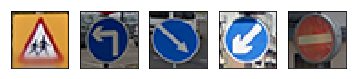

In [52]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
from scipy import misc
from os import listdir
from os.path import isfile, join

NUM_IMAGE = 5
IMAGE_PATH = "new-images"

def load_and_plot(filepath):
    images_path = [join(filepath, f) for f in listdir(filepath) if isfile(join(filepath, f))]    
    test_images = [misc.imread(img, mode='RGB') for img in images_path]
    
    fig = plt.figure()
    for i in range(NUM_IMAGE):
        axis = fig.add_subplot(1, NUM_IMAGE, i + 1, xticks=[], yticks=[])
        axis.imshow(test_images[i])
    print("image shape:", test_images[0].shape)
    plt.show()
    return test_images

images = load_and_plot(IMAGE_PATH)
img_labels = np.array([-1, 34, 38, 39, 17], dtype=uint8)

### Predict the Sign Type for Each Image

In [ ]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

images_preprocessed = preprocess(images)

### Analyse Accuracy

In [53]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
### Evaluate the model

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(images_preprocessed, img_labels)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.800


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [59]:
### Print out the top five softmax probabilities for the predictions 
### on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
feed_dict = {X: images_preprocessed, y: img_labels, keep_prob: 1.}
k_top = 5

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    softmax_operation = tf.nn.softmax(logits)
    top_k_prob = sess.run(tf.nn.top_k(softmax_operation, k_top), feed_dict=feed_dict)

In [60]:
top_k_prob

TopKV2(values=array([[  9.99996901e-01,   3.12298630e-06,   7.25037174e-12,
          5.41090220e-12,   2.14197247e-15],
       [  1.00000000e+00,   4.95940899e-10,   3.13968122e-11,
          1.87330858e-12,   4.56329310e-13],
       [  1.00000000e+00,   2.77048492e-18,   7.98363143e-21,
          3.78449047e-27,   2.64766882e-28],
       [  1.00000000e+00,   7.92236221e-10,   2.15403460e-13,
          1.05713466e-13,   3.47686643e-16],
       [  9.99029160e-01,   9.70657682e-04,   6.99273102e-08,
          6.72719125e-08,   6.47367049e-09]], dtype=float32), indices=array([[28, 29, 30, 20, 23],
       [34, 35, 38, 40, 33],
       [38, 34, 36, 37, 32],
       [39, 33, 37, 40, 36],
       [17, 14, 22,  0, 29]], dtype=int32))

The misclassified and the real Children crossing


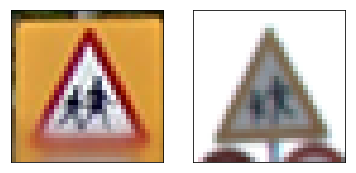

In [79]:
# Where the misclassfied image is not in training set
fig = plt.figure()
axis = fig.add_subplot(1, 2, 1, xticks=[], yticks=[])
axis.imshow(images[0])
axis = fig.add_subplot(1, 2, 2, xticks=[], yticks=[])
axis.imshow(children_passing)
print("The misclassified and the real {}".format(signnames[28]))

plt.show()

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [87]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={X : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

In [94]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    outputFeatureMap(X_train, tf_activation=conv1)

FailedPreconditionError: Attempting to use uninitialized value Variable_15
	 [[Node: Variable_15/read = Identity[T=DT_FLOAT, _class=["loc:@Variable_15"], _device="/job:localhost/replica:0/task:0/cpu:0"](Variable_15)]]

Caused by op 'Variable_15/read', defined at:
  File "//anaconda/envs/carnd-term1/lib/python3.5/runpy.py", line 184, in _run_module_as_main
    "__main__", mod_spec)
  File "//anaconda/envs/carnd-term1/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "//anaconda/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "//anaconda/envs/carnd-term1/lib/python3.5/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "//anaconda/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "//anaconda/envs/carnd-term1/lib/python3.5/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "//anaconda/envs/carnd-term1/lib/python3.5/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "//anaconda/envs/carnd-term1/lib/python3.5/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "//anaconda/envs/carnd-term1/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "//anaconda/envs/carnd-term1/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "//anaconda/envs/carnd-term1/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "//anaconda/envs/carnd-term1/lib/python3.5/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "//anaconda/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "//anaconda/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "//anaconda/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "//anaconda/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "//anaconda/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "//anaconda/envs/carnd-term1/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2683, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "//anaconda/envs/carnd-term1/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2787, in run_ast_nodes
    if self.run_code(code, result):
  File "//anaconda/envs/carnd-term1/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2847, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-85-25ac408e00af>", line 13, in <module>
    'bc1': tf.Variable(tf.zeros([6])),
  File "//anaconda/envs/carnd-term1/lib/python3.5/site-packages/tensorflow/python/ops/variables.py", line 224, in __init__
    expected_shape=expected_shape)
  File "//anaconda/envs/carnd-term1/lib/python3.5/site-packages/tensorflow/python/ops/variables.py", line 370, in _init_from_args
    self._snapshot = array_ops.identity(self._variable, name="read")
  File "//anaconda/envs/carnd-term1/lib/python3.5/site-packages/tensorflow/python/ops/gen_array_ops.py", line 1424, in identity
    result = _op_def_lib.apply_op("Identity", input=input, name=name)
  File "//anaconda/envs/carnd-term1/lib/python3.5/site-packages/tensorflow/python/framework/op_def_library.py", line 759, in apply_op
    op_def=op_def)
  File "//anaconda/envs/carnd-term1/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 2240, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "//anaconda/envs/carnd-term1/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 1128, in __init__
    self._traceback = _extract_stack()

FailedPreconditionError (see above for traceback): Attempting to use uninitialized value Variable_15
	 [[Node: Variable_15/read = Identity[T=DT_FLOAT, _class=["loc:@Variable_15"], _device="/job:localhost/replica:0/task:0/cpu:0"](Variable_15)]]
